In [17]:
"""
This is a simple application for sentence embeddings: clustering
Sentences are mapped to sentence embeddings and then k-mean clustering is applied.
"""
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

embedder = SentenceTransformer('paraphrase-distilroberta-base-v1')

# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'A man is eating pasta.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is riding a horse.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.'
          ]
corpus_embeddings = embedder.encode(corpus)

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['The girl is carrying a baby.', 'The baby is carried by the woman']

Cluster  2
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster  3
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']

Cluster  4
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']

Cluster  5
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']



In [18]:
cluster_assignment

array([1, 1, 1, 0, 0, 2, 2, 4, 4, 3, 3])

In [19]:
corpus_embeddings.shape

(11, 768)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(10,8)})
import umap

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\umap\umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


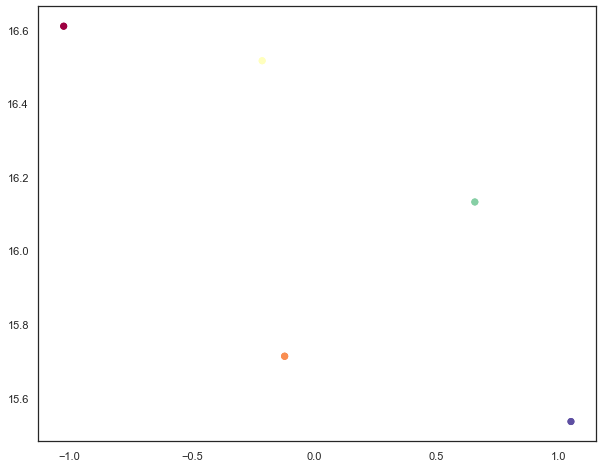

In [21]:


two_dim_embedding = umap.UMAP(n_components=2).fit_transform(corpus_embeddings)

plt.scatter(two_dim_embedding[cluster_assignment, 0],
            two_dim_embedding[cluster_assignment, 1],
            c=cluster_assignment,
            # s=1,
            cmap='Spectral');

In [ ]:
paraphrase-distilroberta-base-v1

In [ ]:
distilbert-base-nli-mean-tokens